**This Project is EDA(Exploratory Data Analysis) Project:**
*   We only Analyze data
*   This project is run on google colab
*   you can  run this project on jupyter notebook with few changes:)



**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as ply
import seaborn as sns
%matplotlib inline

**Mount drive with google colab in order to connect it with drive and easily access data from drive. The main reason to work on colab are:**
* Here you can access GPU for fast training.
* you can upload bulk of data on drive without memory issues.
* It is easy to use for beginners.

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**Changing directory where your data is present**

In [ ]:
cd drive/My Drive/DataCapstoneProject/

/content/drive/My Drive/mycareerstartproj/DataCapstoneProject


**Read csv file and check some statistical detaills**

1.   .describe(): This function can show some statistical details about data.
2.   .info(): This function display information of data. For example no.of rows,number of columns and data types.



In [ ]:
df = pd.read_csv('911.csv')

In [ ]:
df.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Ask yourself Questions**

*   While exploring data, it is very important that you cover every aspect of data visualization in order to fully understant what type of data it is and what model best suit your data.



In [ ]:
#What are the top 5 zipcodes for 911 calls?
df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [ ]:
#what are the top 5 township(twp) for 911 calls?
df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [ ]:
#Take a look at the title column,how many unique title codes are there?
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [ ]:
#how many unique titles in number?
len(df['title'].unique())

148

**Creating New Features**

In [ ]:
# In the title column there are "Reason/Department" specified before the title code.These are EMS,Fire and Traffic.Use .apply() with a custom lambda 
#expression to create a new column called "Reason" that contains this String value.
#For example if the title column value is EMS:Back Pains/Injury,the Reason column value would be EMS.

#Programming Logic
#x = df['title'].iloc[0]
#g=x.split(':')[0]


In [ ]:
df['Reason'] = df['title'].apply(lambda title : title.split(':')[0])

In [ ]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

In [ ]:
#What is the most common Reason for a 911 call based off this new column?
df['Reason'].value_counts().head(3)

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

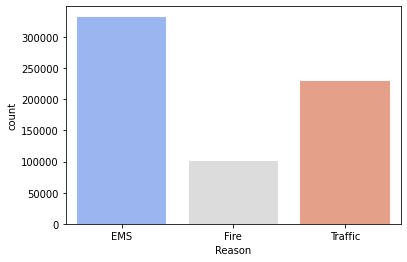

In [ ]:
#now use seaborn to create count plot of 911 calls by Reason?
sns.countplot(x='Reason',data=df,palette='coolwarm',)

**Time Information Manipulation**

In [ ]:
#what is the data type of objects in the timestamp column?
type(df['timeStamp'].iloc[0])

str

In [ ]:
#As we know that Timestamp is a date time object .we have to change it from string to DateTime object
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [ ]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#now we can pick any specific element of timestamp
time = df['timeStamp'].iloc[0]
time.hour

17

In [ ]:
#As we have DateTime object ,we can create 3 columns out of TimeStamp by using .apply() function as hour,month and day of week.
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:10:52')

In [ ]:
#time.hour
time.month
#time.week

12

In [ ]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [ ]:
df['month'] = df['timeStamp'].apply(lambda time: time.month)

In [ ]:
df['day of week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


**Day of week is an integer from 0-6.Use the .map() with this dictionary to map the actual String names to the day of week:**

In [ ]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'sun'}

In [ ]:
df['day of week'] = df['day of week'].map(dmap)

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu


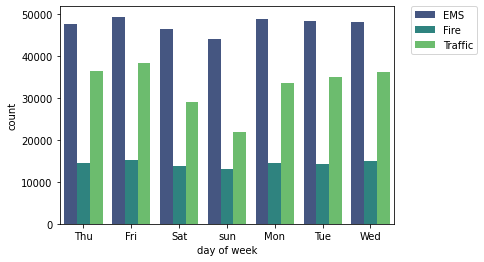

In [ ]:
sns.countplot(x='day of week',data = df,hue = 'Reason',palette='viridis')
ply.legend(bbox_to_anchor = (1.05,1) , loc =2,borderaxespad=0)

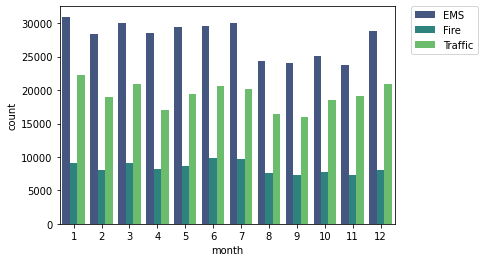

In [ ]:
sns.countplot(x='month',data = df,hue = 'Reason',palette='viridis')
ply.legend(bbox_to_anchor = (1.05,1) , loc =2,borderaxespad=0)

**There is possibility that some data in plot is missing.For Example some months from plot is missing.So we can plot the information in an other way,possibaly a simple line plot that fills in the missing months.In order to do this we will need to do some work with pandas.**

In [ ]:
bymonth = df.groupby('month').count()

In [ ]:
#Here you notice that all columns have same entries but zip column have some values as null thats why there count is less than others.
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,day of week
month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509
6,60034,60034,60034,52593,60034,60034,60005,60034,60034,60034,60034,60034
7,59832,59832,59832,52507,59832,59832,59802,59832,59832,59832,59832,59832
8,48359,48359,48359,42311,48359,48359,48335,48359,48359,48359,48359,48359
9,47213,47213,47213,41289,47213,47213,47196,47213,47213,47213,47213,47213


In [ ]:
#So we use latitude column which means if latitude is there the call actually took place.
#Now create a simple plot off the dataframe indicating the count of calls per month.
#Simple plot function can also give sufficient information about data and see how pronounce this drop is.
bymonth['lat'].plot()

**Now if we use seaborn's lmplot() to create a linear fit on the number of calls per months.Keep in mind you may need to reset the index to a column.**

In [ ]:
#bymonth.reset_index()

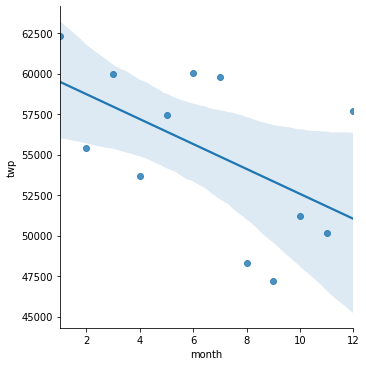

In [ ]:
sns.lmplot(x='month',y='twp',data=bymonth.reset_index())

**Exploring The Date**

**Create a new column called "Date" that contains the date from the timeStamp column. you'll need it to use apply along with .date() method**

In [ ]:
t = df['timeStamp'].iloc[0]

In [ ]:
df['Date'] = df['timeStamp'].apply(lambda t:t.date())

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,month,day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


In [ ]:
df.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,month,day of week
Date,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444


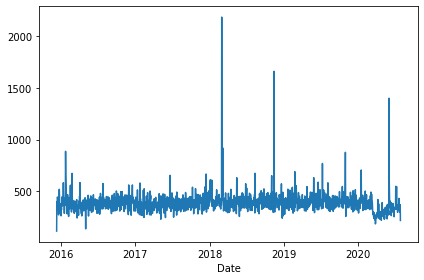

In [ ]:
df.groupby('Date').count()['lat'].plot()
ply.tight_layout()

**Now we create a plot for every indivisual Reason**

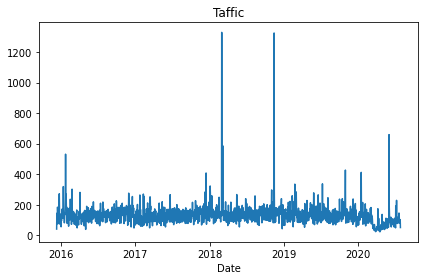

In [ ]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
ply.title('Taffic')
ply.tight_layout()

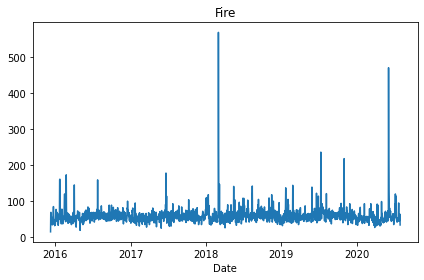

In [ ]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
ply.title('Fire')
ply.tight_layout()

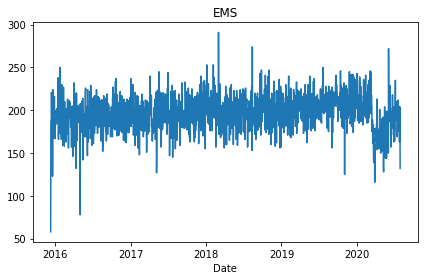

In [ ]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
ply.title('EMS')
ply.tight_layout()

**Heat Maps:As we know that when we want to create Heat Map,we have to convert data into matrix form.**

In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,month,day of week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


In [ ]:
#Here we use two columns for heat map.day of week and our.
#From this we can identify that in which day of week and at what time more 911 calls are recorded.
dayHour = df.groupby(by=['day of week','Hour']).count()['Reason'].unstack()

**From the below figure, it is clear that there is very less criminal activities and emergencies during early in morning and in saturday sundays and high rate in week days and day time hour**

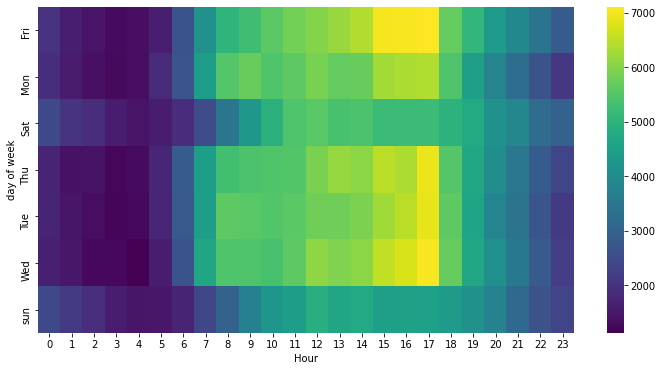

In [ ]:
ply.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap ='viridis')

**The above described conclusion is more clear in cluster map below**

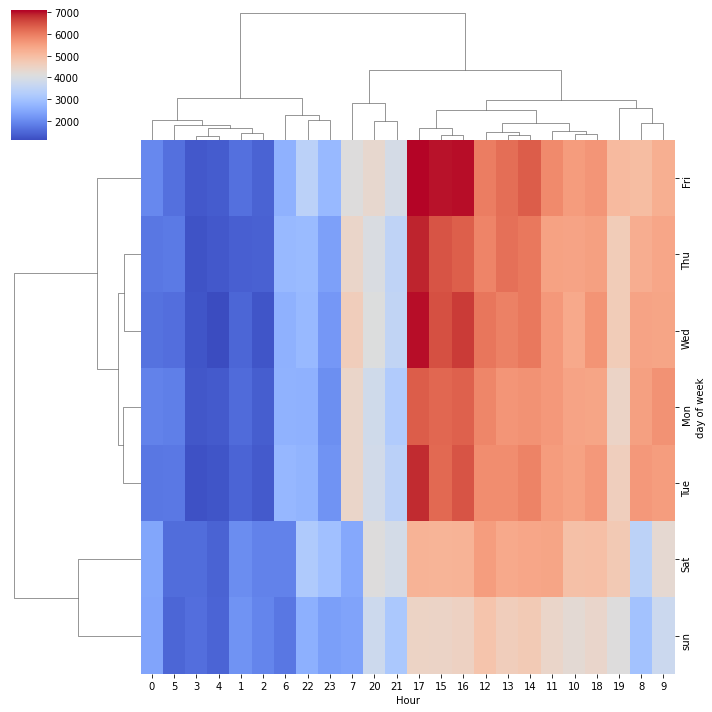

In [ ]:
sns.clustermap(dayHour,cmap='coolwarm')

**Now repeat these same plots ,for dataframe that shows the months as the column**

In [ ]:
dayMonth=df.groupby(by=['day of week','month']).count()['Reason'].unstack()

In [ ]:
dayMonth

month,1,2,3,4,5,6,7,8,9,10,11,12
day of week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151
Tue,9714,8087,8372,7561,9026,8349,9086,7291,6601,7948,7344,8305
Wed,9409,8296,8989,7602,9041,9443,8581,7984,6844,7876,7410,7682
sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165


**With respect to months we observe that most of the emergency calls are made in summer months week days**

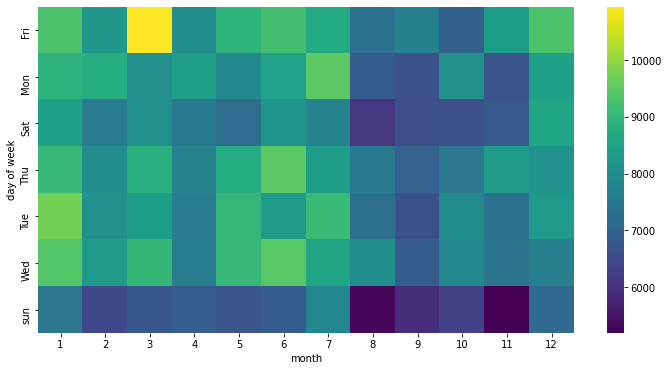

In [ ]:
ply.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap ='viridis')

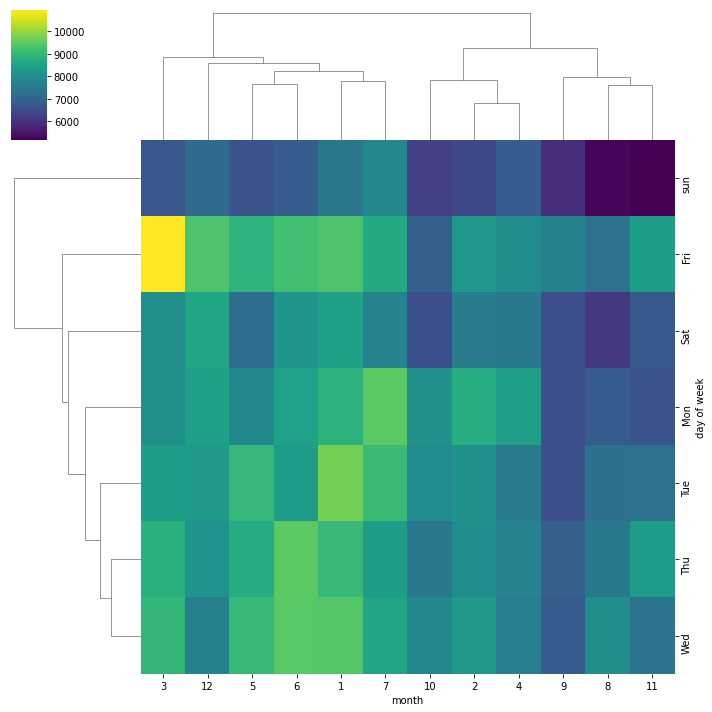

In [ ]:
sns.clustermap(dayMonth,cmap='viridis')

**Now we have to visualize on indivisual basis**